# autoencoder 이용하여 Mnist 잡음 제거하기

### 1) 데이터 준비

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

In [27]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [28]:
(x_train.shape, y_train.shape),(x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [29]:
X_train = x_train[:3000, :] / 255.0
X_test = x_test[3000:3100, :] / 255.0

### 2) 노이즈 삽입

In [30]:
X_train_n = X_train + 0.3 * np.random.normal(size=X_train.shape)
X_test_n = X_test + 0.3 * np.random.normal(size=X_test.shape)

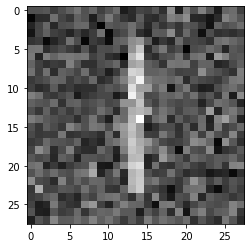

In [31]:
plt.imshow(X_train_n[102].reshape(28, 28), cmap='gray')

### 3) 값 범위 clip

In [32]:
X_train_n_clipped = np.clip(X_train_n, 0.0, 1.0)
X_test_n_clipped = np.clip(X_test_n, 0.0, 1.0)

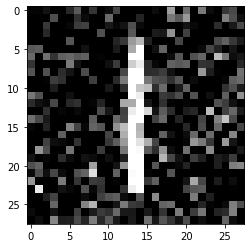

In [33]:
plt.imshow(X_train_n_clipped[102].reshape(28, 28), cmap='gray')

### 6) 모델 레이어 설정

In [34]:
# Encoder
X = tf.keras.layers.Input(shape=[28,28,1])
H = tf.keras.layers.Conv2D(32, (3,3), strides=1, padding='same', activation='relu')(X)
H = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(H)

# Decoder : Conv2DTranspose 업샘플링시 strides=2 해야 함
H = tf.keras.layers.Conv2DTranspose(32, (3,3), strides=2, padding='same', activation='relu')(H)
Y = tf.keras.layers.Conv2D(1, (3,3),  strides=1, padding='same', activation='sigmoid')(H)

model = tf.keras.Model(X, Y)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 1)         289       
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [36]:
model.fit(X_train_n, X_train, epochs=200, batch_size=128)

Epoch 1/200
24/24 [==============================] - 1s 8ms/step - loss: 0.6369 - accuracy: 0.6587
Epoch 2/200
24/24 [==============================] - 0s 7ms/step - loss: 0.3653 - accuracy: 0.8093
Epoch 3/200
24/24 [==============================] - 0s 6ms/step - loss: 0.2038 - accuracy: 0.8108
Epoch 4/200
24/24 [==============================] - 0s 6ms/step - loss: 0.1309 - accuracy: 0.8097
Epoch 5/200
24/24 [==============================] - 0s 6ms/step - loss: 0.1143 - accuracy: 0.8106
Epoch 6/200
24/24 [==============================] - 0s 6ms/step - loss: 0.1080 - accuracy: 0.8134
Epoch 7/200
24/24 [==============================] - 0s 6ms/step - loss: 0.1045 - accuracy: 0.8127
Epoch 8/200
24/24 [==============================] - 0s 6ms/step - loss: 0.1011 - accuracy: 0.8130
Epoch 9/200
24/24 [==============================] - 0s 6ms/step - loss: 0.0982 - accuracy: 0.8137
Epoch 10/200
24/24 [==============================] - 0s 6ms/step - loss: 0.0961 - accuracy: 0.8147
Epoch 11/

In [37]:
X_test_pred = model.predict(X_test_n)

In [38]:
X_test_pred = X_test_pred.reshape(-1,28,28)
X_test_pred.shape

(100, 28, 28)

In [39]:
def show_image(X):
  plt.figure(figsize=(18,10))
  for i in range(10):
    ax = plt.subplot(1,10,i+1)
    ax.imshow(X[i], cmap='gray')

잡음 제거 전 테스트 데이터 10개


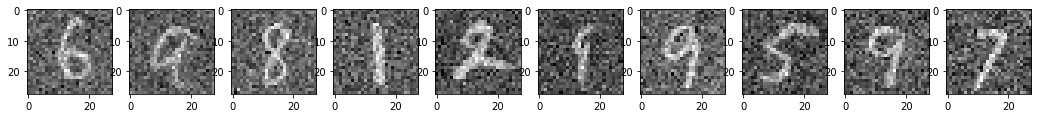

In [40]:
print("잡음 제거 전 테스트 데이터 10개")
show_image(X_test_n)

잡음 제거 후 테스트 데이터 10개


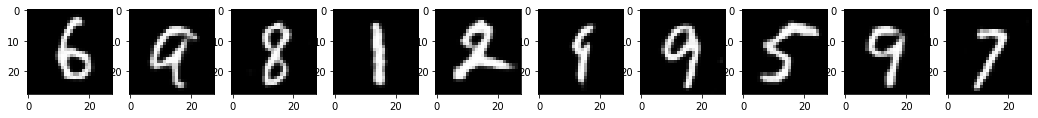

In [41]:
print("잡음 제거 후 테스트 데이터 10개")
show_image(X_test_pred)